(page:beat-frequency)=
# Beat frequency

The Autonomous phase-sensitive Radio-Echo Sounder (ApRES) uses the concept of *beat frequency* to compute the difference in the frequency between a transmitted signal and a received signal. From this frequency, the range to each englacial reflector can be calculated (see [here](page:apres-theory)).

Beat freqencies occur when two waves with different frequencies are superimposed, producing a third wave that is the sum of the two original waves. Because the two waves have different frequencies, they gradually shift out of and into phase with one another as time goes by. Where they are in phase they interfere constructively and where they are out of phase they interfere destructively. So, as they shift in and out of phase the resulting wave increases and descreases in amplitude. This occurs at a particular frequency: the beat frequency. 

Below we explore this numerically and theoretically.

## Numerical addition of waves
Let's start by getting a feel for what we expect to see by superimposing two waves numerically. 
We will define two waves $s_1$ and $s_2$ by 
$
s_1 = A_1 \sin \left(\omega_1 t\right)
$

and

$
s_2 = A_2 \sin \left(\omega_2 t\right).
$

Their amplitudes are $A_1$ and $A_2$, and their *angular frequencies* are $\omega_1$ and $\omega_2$.  


```{note}
Angular frequencies $\omega$ tell us how fast the phase of a wave increaes with time. The units of $\omega$ are radians per second. Angular frequency is related to *frequency* $f$ by $\omega = 2\pi f$.
```

We start by loading two python packages, Numpy and Matplotlib. [Numpy](https://numpy.org/) is for doing calculations with arrays. [Matplotlib](https://matplotlib.org/) is for plotting. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next let's define $\pi$ and a time vector which runs from $t=0$ seconds to $t=40\pi$ seconds and has 1000 elements.

In [2]:
pi = np.pi                                # define pi
t = np.linspace(0.0, 40*pi, num=1000)     # define a time vector 

Next we define a function which we will use to create our waves. It will take as input the desired amplitude and the desired angular frequency.

In [3]:
def wave(A,omega):
    return A*np.sin(omega*t)

Now we can use this function to define two waves with two slightly different frequencies of 2 and 1.8 rad s$^{-1}$

In [9]:
omega1 = 2
A1 = 1
s1 = wave(A1,omega1)

omega2 = 1.8
A2 = 1
s2 = wave(A1,omega2)

When we plot both waves against time we can see how $s_1$, with its slightly lower frequency, (in blue below) starts to lag behind $s_2$ (in orange) after only one cycle. By $t\approx 15$ s they are in anti-phase, and by $t\approx 30$ s they are back in phase again. This shifting in and out of phase repeats regularly across the plot.

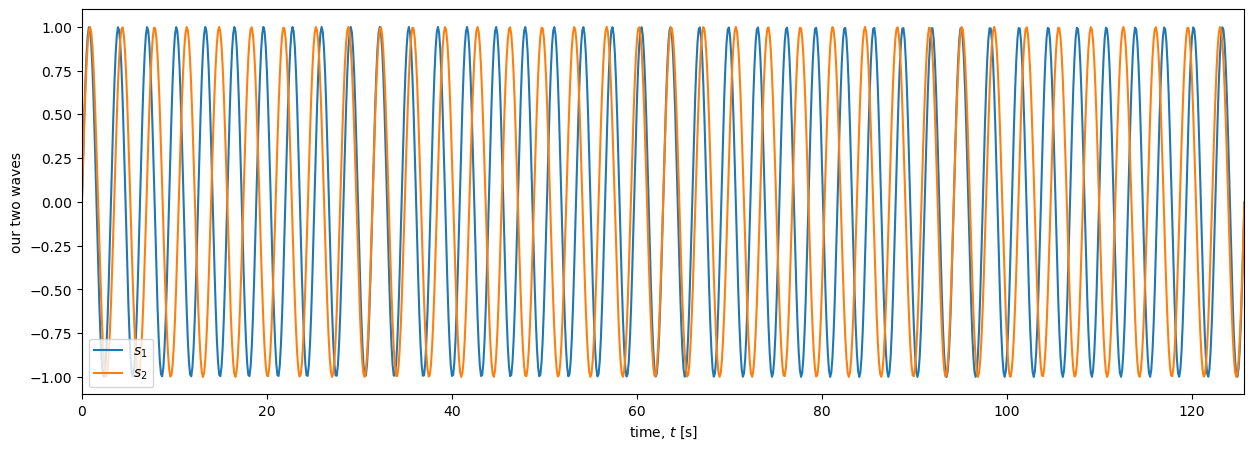

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(t,s1,t,s2);
plt.ylabel('our two waves')
plt.xlabel('time, $t$ [s]')
plt.autoscale(enable=True, axis='x', tight=True)

plt.legend(['$s_1$','$s_2$'],loc='lower left')
plt.show()

To see how this affects the sum of the two waves we will plot $s_1+s_2$.

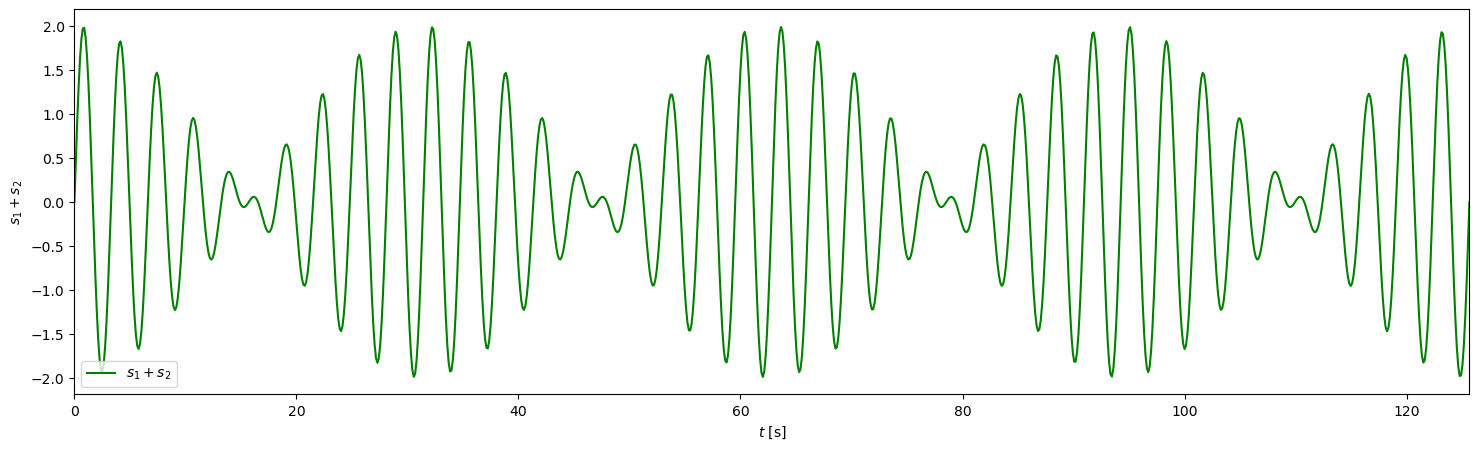

In [11]:
plt.figure(figsize=(18, 5))
plt.plot(t,s1+s2,'g');
plt.ylabel('$s_1 + s_2$')
plt.legend(['$s_1+s_2$'],loc='lower left')
plt.xlabel('$t$ [s]')
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

As we discussed at the top of this page, where the two waves are in phase, summing them causes constructive interference and we get waves with amplitudes of $A_1+A_2 = 1$. Similarly, where they are in antiphase they interfer destructively and the waves are much smaller, instanteously reaching zero amplitude at $t\approx$ 15, 50, etc. In other words, it appears that this new signal ($s_1 + s_2$) consists of relatively high frequency waves with a uniform frequency similar to the frequency of $s_1$ and $s_2$, which are modulated by a lower frequency repeating signal. 

## Trignometry tells us the frequencies

It turns out that some trignometry shows that this lower frequency signal is the difference between the two signals - exactly what we need for estimating the range to reflectors with ApRES.

Assume, as we did above, that the amplitudes of the waves are the same ($A_1 = A_2$). Summing two well known trignometric identities

$
\sin(\alpha+\beta) = \sin(\alpha)\cos(\beta) + \cos(\alpha)\sin(\beta)
$

and

$
\sin(\alpha-\beta) = \sin(\alpha)\cos(\beta) - \cos(\alpha)\sin(\beta),  
$

gives 

$
\frac{1}{2}[\sin(\alpha+\beta)+\sin(\alpha-\beta)] = \sin(\alpha)\cos(\beta).
$

Then we substitute in $u = \alpha+\beta$ and $v = \alpha-\beta$ to get 

$
\frac{1}{2}[\sin(u)+\sin(v)] = \sin(\alpha)\cos(\beta).
$

Then, recongizing that $u + v = 2\alpha$ and $u - v = 2\beta$, we find

$
\frac{1}{2}[\sin(u)+\sin(v)] = \sin\left(\frac{u + v}{2}\right)\cos\left(\frac{u - v}{2}\right).
$

This is one of the so-called *sum-to-product* trignometric identities. Finally, subsituting in $u = \omega_1 t$ and $v = \omega_2 t$ provides our answer:

$
\sin(\omega_1 t)+\sin(\omega_2 t) = 2\sin\left(\frac{\omega_1  + \omega_2}{2}t\right)\cos\left(\frac{\omega_1  - \omega_2 }{2}t\right).
$

The frequencies of the two components of the function ($s_1+s_2$) plotted above are (1) the average of frequencies of the two waves, and (2) half the difference between the frequencies. 

## Compare the theoretical and numerical predictions
To demonstrate this, let's plot the two components and their sum and compare them to the plot above. For clarity, let's first define

$
g_1 = \sin\left(\frac{\omega_1 t + \omega_2 t}{2}\right)
$

and

$
g_2 = \cos\left(\frac{\omega_1 t - \omega_2 t}{2}\right).
$

Then plot these two functions against time.

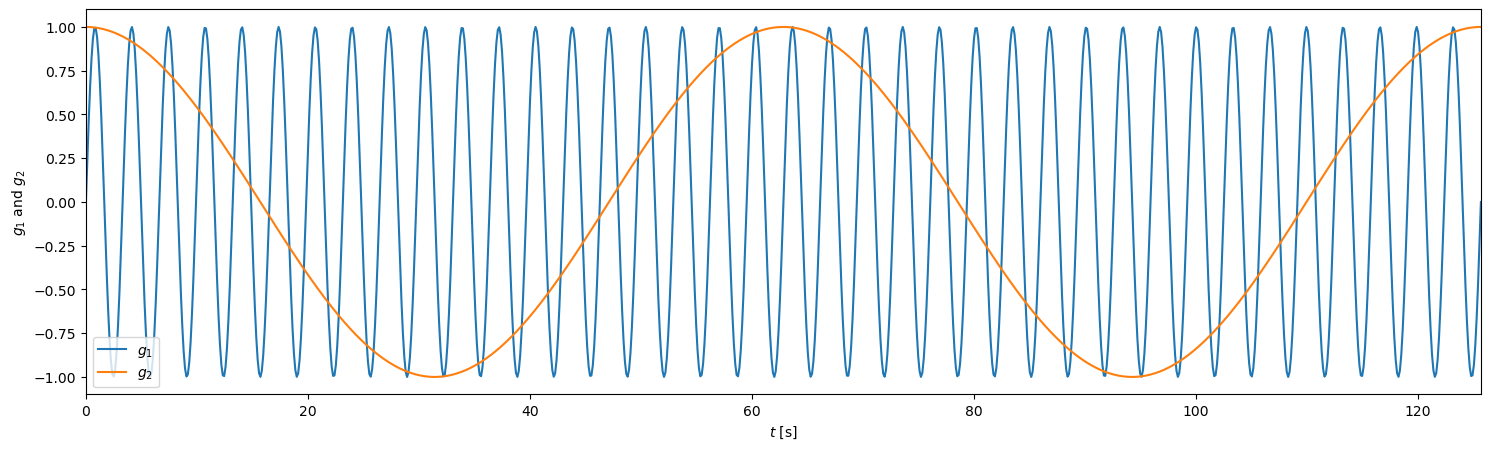

In [12]:
# we will use our function 'wave' again when we can
g1 = wave(A1,(omega1 + omega2)/2)
g2 = A2*np.cos((omega1 - omega2)*t/2)

plt.figure(figsize=(18, 5))
plt.plot(t,g1,t,g2);
plt.ylabel('$g_1$ and $g_2$')
plt.legend(['$g_1$','$g_2$'],loc='lower left')
plt.xlabel('$t$ [s]')
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

This looks promising. But to really compare this to the green plot above ($s_1 + s_2$) we need to plot $2g_1 g_2$, as follows. 

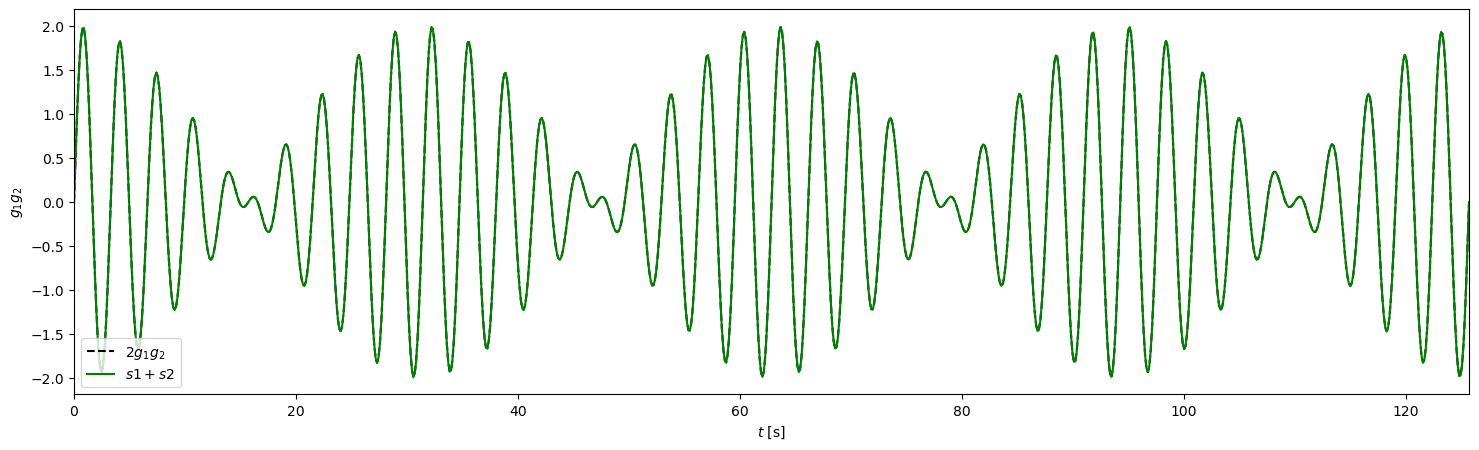

In [13]:
plt.figure(figsize=(18, 5))
plt.plot(t,2*g1*g2,'k--',t,s1+s2,'g');
plt.ylabel('$g_1 g_2$')
plt.legend(['$2 g_1 g_2$','$s1+s2$'],loc='lower left')
plt.xlabel('$t$ [s]')
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

As expected, the lower frequency signal, $g_2$, modulates the higher frequency signal, $g_1$. Note that the increase and decrease in amplitude occurs where $g_2 > 0$ or $g_2<0$, so the modulation has a frequency of $2g_2$, i.e. $\omega_1 - \omega_2$. This is called the beat frequency.  

## Filtering to isolate the beat frequency

Throughout each chirp, ApRES continuously sums the received and transmitted signals, producing a signal with high frequency components corresponding to $g_1$ and low frequency components corresponding to $g_2 = \omega_2 - \omega_1$, the beat frequency, which is the component used to compute the range to reflectors. The high frequency component is in the megahertz range and the low frequency component is in the kilohertz range. To isolate the low frequnecy component, the radar passes the signal through a low-pass filter. The response is shown in {numref}`fig:active-filter-ApRES`.

```{figure} ../../../images/active-filter-ApRES.png
---
height: 500px
name: fig:active-filter-ApRES
---
The frequency response of the active filter in ApRES. From a slide show that can be found [here](https://github.com/ldeo-glaciology/phase-sensitive-radar-processing/blob/5cce6bd838cb70e290316195af9ceefe3d4a52ee/other%20documents/ApRES%20Tutorial.pdf).

As well as isolating the kHz component of the signal, this filter preferentially amplifies higher frequencies in the kHz range to amplify distant targets.  

## Summary
During measurements ApRES continuously combines the signal it receives from the receiving antenna with the signal it is tranmitting. Because it takes some time for the transmitted signal to arrive back at the radar, the frequencies of the transmitted and received signals are very slightly different, so they combine to create a signal with a frequnecy componet that is proportional to the difference in the frequencies - the beat frequency. This difference is proprtional to the range to the reflector, so to estimate the range, we just need to estimate the beat frequency. 

The previous page describes how this is done in theory using a fourier transform. 

The next page demonstates how this is done with real ApRES data collected from Antarctica. 